<a href="https://colab.research.google.com/github/anushkagupta0203/logreg-randomforest-student-pass-predictor/blob/main/Classification-LogRegression-RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello Notebook")

Hello Notebook


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
file_id = "1QBRjw_YzndejAc2vvYi_mVsyo3mPh41a"  # Your File ID
dataset_url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(dataset_url)

In [ ]:
# Display first few rows
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Data Cleaning: Checking for missing values
print("Missing values:")
print(df.isnull().sum())  # No missing values expected

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Convert categorical columns to numerical using Label Encoding
encoder = LabelEncoder()
categorical_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Create a target variable (Pass/Fail)
def pass_fail(score):
    return 1 if score >= 40 else 0


In [ ]:
df['pass_math'] = df['math score'].apply(pass_fail)
df['pass_reading'] = df['reading score'].apply(pass_fail)
df['pass_writing'] = df['writing score'].apply(pass_fail)

In [ ]:
df['overall_pass'] = df[['pass_math', 'pass_reading', 'pass_writing']].min(axis=1)  # Student must pass all subjects

In [ ]:
df.drop(columns=['pass_math', 'pass_reading', 'pass_writing'], inplace=True)

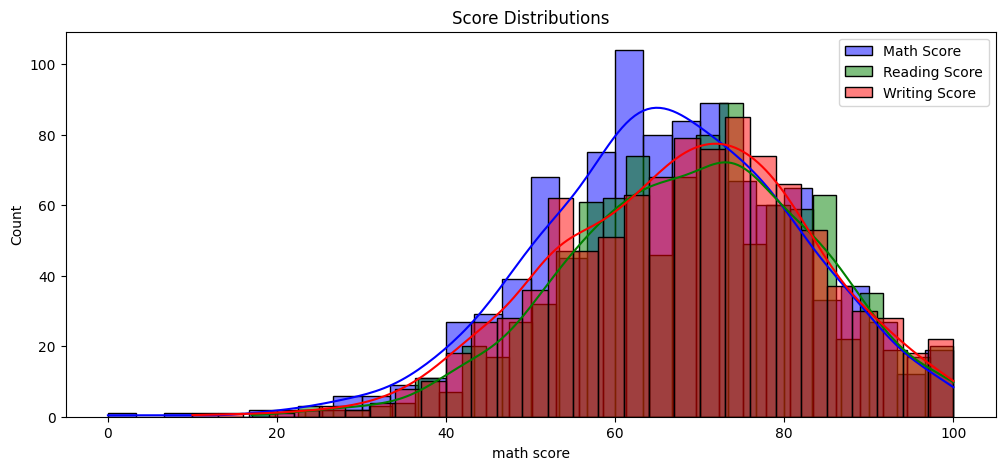

In [ ]:
# EDA: Visualizing score distributions
plt.figure(figsize=(12,5))
sns.histplot(df['math score'], kde=True, color='blue', bins=30, label='Math Score')
sns.histplot(df['reading score'], kde=True, color='green', bins=30, label='Reading Score')
sns.histplot(df['writing score'], kde=True, color='red', bins=30, label='Writing Score')
plt.legend()
plt.title("Score Distributions")
plt.show()

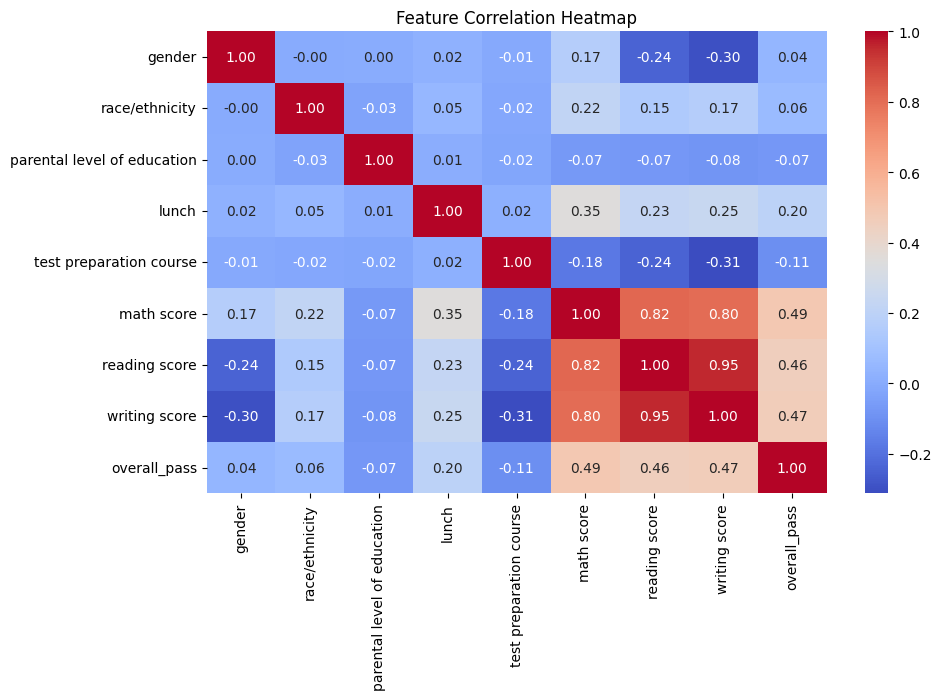

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Splitting Data into Training and Testing Sets
X = df.drop(columns=['overall_pass'])  # Features
y = df['overall_pass']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [ ]:
# # Model 2: Random Forest Classifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    cm=confusion_matrix(y_true, y_pred)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")
    #Confusion Matrix Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

Logistic Regression Evaluation:
Accuracy: 0.985
Confusion Matrix:
 [[ 11   2]
 [  1 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.99      0.99      0.99       187

    accuracy                           0.98       200
   macro avg       0.95      0.92      0.94       200
weighted avg       0.98      0.98      0.98       200





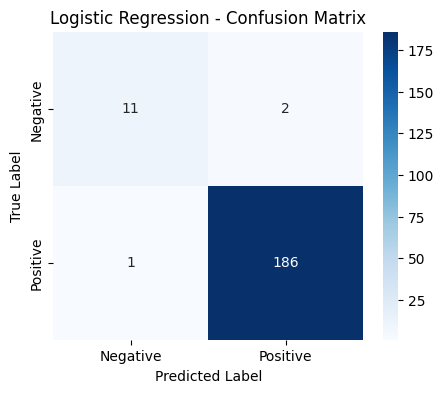

In [ ]:
# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
# evaluate_model(y_test, y_pred_rf, "Random Forest")


In [ ]:
print(y_test)

521    1
737    1
740    1
660    1
411    1
      ..
408    1
332    1
208    1
613    1
78     1
Name: overall_pass, Length: 200, dtype: int64


In [ ]:
# Sample test data (Modify values as needed)
sample_test_data = pd.DataFrame({
    "gender": [1],  # Encoded values
    "race/ethnicity": [2],
    "parental level of education": [3],
    "lunch": [1],
    "test preparation course": [0],
    "math score": [65],
    "reading score": [70],
    "writing score": [75]
})

In [ ]:
# Predict pass/fail outcome
sample_prediction = log_model.predict(sample_test_data)

# Display prediction
print("Predicted Outcome (1 = Pass, 0 = Fail):", sample_prediction[0])


Predicted Outcome (1 = Pass, 0 = Fail): 1
